In [21]:
#Before importing, one should make sure that the following packages are 
#all installed, if not, then install them with "pip install" and then proceed
#and run the program
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

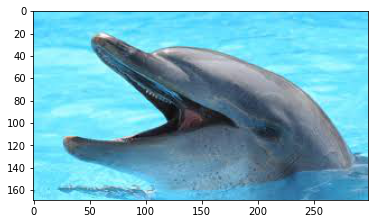

In [8]:
image_path = "C:/Users/JIM/Desktop/Data/mydata/training/dolphin/" #Give the local directory to open a random image from the dataset
img = image.load_img(image_path + "7.jpg")
plt.imshow(img)

In [9]:
cv2.imread(image_path + "7.jpg")

array([[[249, 226, 104],
        [250, 227, 105],
        [250, 227, 105],
        ...,
        [255, 228, 112],
        [255, 229, 112],
        [255, 228, 115]],

       [[249, 226, 104],
        [250, 227, 105],
        [250, 227, 105],
        ...,
        [255, 230, 112],
        [255, 230, 113],
        [255, 229, 115]],

       [[250, 226, 102],
        [250, 226, 102],
        [251, 227, 103],
        ...,
        [255, 224, 106],
        [255, 224, 107],
        [255, 223, 109]],

       ...,

       [[255, 242, 131],
        [255, 243, 132],
        [255, 242, 131],
        ...,
        [216, 173,  62],
        [219, 175,  62],
        [219, 175,  62]],

       [[250, 233, 122],
        [252, 235, 124],
        [254, 235, 124],
        ...,
        [224, 179,  68],
        [224, 179,  68],
        [226, 180,  68]],

       [[255, 239, 129],
        [255, 245, 135],
        [255, 240, 130],
        ...,
        [226, 178,  72],
        [226, 178,  72],
        [227, 180,  72]]

In [22]:
#From the values of the matrixes of all the images, we saw that 255 is the highest value. 
#We want to have numbers between 0 and 1 to train the neural network, therefore
#we will devide all those numbers with 255.
train = ImageDataGenerator(rescale = 1/255)
validaton = ImageDataGenerator(rescale = 1/255)

In [43]:
#Lets give the training dataset first
train_Path = "C:/Users/JIM/Desktop/Data/mydata/training/"   #Carefully give the correct path here
train_ds = train.flow_from_directory(train_Path, 
                                     target_size=(220,220), #Set the dimensions of the images
                                     batch_size = 3,        #We do not have too many images, so we keep the batch size (training examples in a single iteration) low at 3
                                     class_mode = "binary") #we have two labes (doplhin/shark), so the class mode is binary

#same for validation 
val_Path = "C:/Users/JIM/Desktop/Data/mydata/validation/"
validation_ds = train.flow_from_directory(val_Path, 
                                          target_size=(220,220),
                                          batch_size = 3,
                                          class_mode = "binary")

Found 90 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [39]:
model = Sequential([ layers.Conv2D(16, 3, padding='same', activation='relu'),
                                     layers.MaxPooling2D(),
                                     layers.Conv2D(32, 3, padding='same', activation='relu'),
                                     layers.MaxPooling2D(),
                                     layers.Conv2D(64, 3, padding='same', activation='relu'),
                                     layers.MaxPooling2D(),
                                     layers.Flatten(),
                                     layers.Dense(128, activation='relu'),
                                     layers.Dense(1,activation='sigmoid')                     
                                  ])

In [40]:
model.compile(optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'],
              loss='binary_crossentropy')

In [41]:
#Let's train the model
number_of_epochs = 12
steps_per_epoch = 3
model_fit = model.fit(train_ds,
                     epochs = number_of_epochs,         #We can change the number of epochs of training, the more we have the more accurate our model will be. steps per epoch and make them more if we want to train more
                     steps_per_epoch = steps_per_epoch, #Same with the steps per epoch, we make them more if we want to train more
                     validation_data = validation_ds)

Epoch 1/12
3/3 [==============================] - 1s 463ms/step - loss: 3.9231 - accuracy: 0.6667 - val_loss: 1.3881 - val_accuracy: 0.5000
Epoch 2/12
3/3 [==============================] - 1s 369ms/step - loss: 1.1678 - accuracy: 0.4444 - val_loss: 0.6982 - val_accuracy: 0.4412
Epoch 3/12
3/3 [==============================] - 1s 353ms/step - loss: 0.8346 - accuracy: 0.5556 - val_loss: 0.6811 - val_accuracy: 0.5588
Epoch 4/12
3/3 [==============================] - 1s 405ms/step - loss: 0.7944 - accuracy: 0.2222 - val_loss: 0.6861 - val_accuracy: 0.5882
Epoch 5/12
3/3 [==============================] - 1s 380ms/step - loss: 0.6820 - accuracy: 0.5556 - val_loss: 0.6479 - val_accuracy: 0.7353
Epoch 6/12
3/3 [==============================] - 1s 389ms/step - loss: 0.7964 - accuracy: 0.2222 - val_loss: 0.6746 - val_accuracy: 0.5588
Epoch 7/12
3/3 [==============================] - 1s 348ms/step - loss: 0.6380 - accuracy: 0.7778 - val_loss: 0.6629 - val_accuracy: 0.5294
Epoch 8/12
3/3 [====

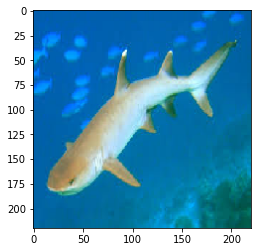

This is an image of a shark!


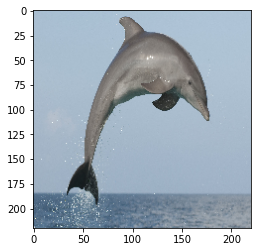

This is an image of a dolphin!


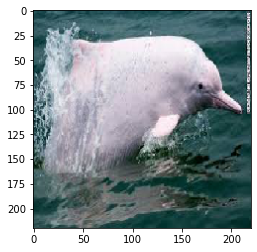

This is an image of a dolphin!


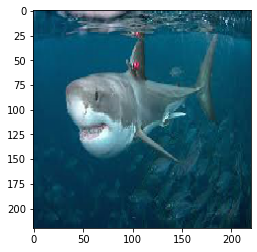

This is an image of a shark!


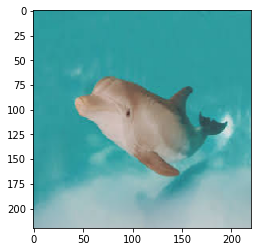

This is an image of a dolphin!


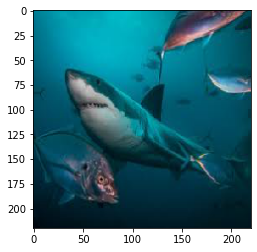

This is an image of a shark!


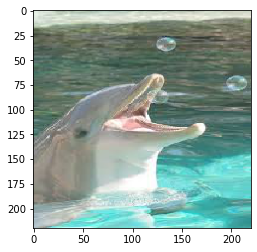

This is an image of a dolphin!


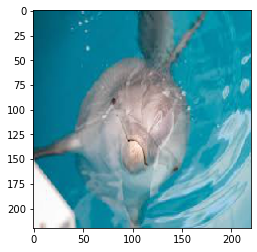

This is an image of a shark!


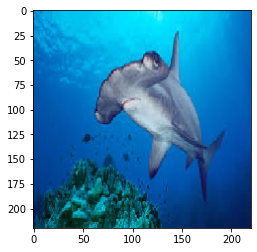

This is an image of a shark!


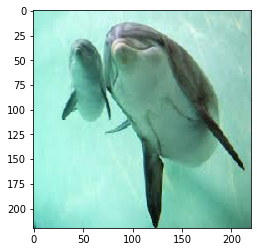

This is an image of a dolphin!


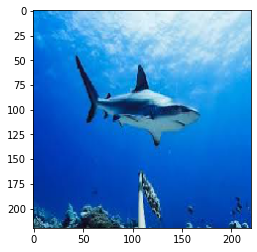

This is an image of a shark!


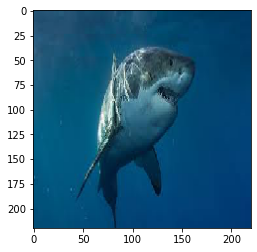

This is an image of a shark!


In [42]:
#Now let's test our model with the testing dataset

test_path = "C:/Users/JIM/Desktop/Data/mydata/testing"

for i in os.listdir(test_path):
    img = keras.preprocessing.image.load_img(test_path+'//'+ i, target_size=(220,220))
    
    plt.imshow(img)
    plt.show()
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 
    pred = model.predict(img_array)
    if pred == 0:
        print("This is an image of a dolphin!")
    else:
        print("This is an image of a shark!")
        